Homework Assignment 1

Avinit Mohanty

Net ID: axm162731

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.graph_objs import *
# py.sign_in('avinit.mohanty', '4LkWZFQI9CGpq7NEV2gX') 
# plotly.tools.set_credentials_file(username='avinit.mohanty', api_key='4LkWZFQI9CGpq7NEV2gX')
%matplotlib inline
import seaborn as sns
import cufflinks as cf

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.0.15


In [3]:
# For Notebooks
init_notebook_mode(connected=True)

In [4]:
import os
cwd = os.getcwd()
path = 'C:\\Users\\Avinit Mohanty\\Documents\\Python_lectures\\Week5\\congressional-election-disbursements'
os.chdir(path)
cwd_new = os.getcwd()
cwd_new

'C:\\Users\\Avinit Mohanty\\Documents\\Python_lectures\\Week5\\congressional-election-disbursements'

In [5]:
df2010 = pd.read_csv("all_house_senate_2010.csv",encoding='ISO-8859-1', low_memory=False)
df2012 = pd.read_csv("all_house_senate_2012.csv",encoding='ISO-8859-1', low_memory=False)
df2014 = pd.read_csv("all_house_senate_2014.csv",encoding='ISO-8859-1', low_memory=False)
df2016 = pd.read_csv("all_house_senate_2016.csv",encoding='ISO-8859-1', low_memory=False)

In [6]:
# concatenating the above dataframes
df = pd.concat([df2010, df2012, df2014, df2016])
#checking the concatenated file
df.head()

,com_id,com_nam,can_id,can_nam,ele_yea,can_off,can_off_sta,can_off_dis,lin_num,lin_ima,...,rec_zip,dis_dat,dis_amo,dis_pur_des,mem_cod,mem_tex,cat_cod,cat_des,tra_id,bac_ref_id
0,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?109306...,...,064608708,2010-04-01,$254.40,POSTAGE MACHINE LEASE,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-25707,NaN
1,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?109306...,...,193439533,2010-04-01,"$1,650.00",OFFICE RENT,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-25700,NaN
2,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,070541867,2010-09-13,"$3,140.00",ADVERTISING: WEB ADVERTISING,NaN,NaN,004,Advertising Expenses,B-E-27437,NaN
3,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,150908655,2010-09-13,"$2,305.00",FUNDRAISING: FUNDRAISING COMMISSION,NaN,NaN,003,Solicitation and Fundraising Expenses,B-E-27443,NaN
4,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,152507461,2010-09-13,$44.72,OVERNIGHT MAIL,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-27432,NaN


In [7]:
#stripping the $ sign in dis_amo column from the amount field and convertinf into float - manipulating data

# in concatenated file
df['dis_amo'] = df['dis_amo'].str.replace(',', '')
df['dis_amo'] = df['dis_amo'].str.replace('$', '')
df['dis_amo'] = df['dis_amo'].astype(float)

#in individual file
df2010['dis_amo'] = df2010['dis_amo'].str.replace(',', '')
df2010['dis_amo'] = df2010['dis_amo'].str.replace('$', '')
df2010['dis_amo'] = df2010['dis_amo'].astype(float)

df2012['dis_amo'] = df2012['dis_amo'].str.replace(',', '')
df2012['dis_amo'] = df2012['dis_amo'].str.replace('$', '')
df2012['dis_amo'] = df2012['dis_amo'].astype(float)

df2014['dis_amo'] = df2014['dis_amo'].str.replace(',', '')
df2014['dis_amo'] = df2014['dis_amo'].str.replace('$', '')
df2014['dis_amo'] = df2014['dis_amo'].astype(float)

df2016['dis_amo'] = df2016['dis_amo'].str.replace(',', '')
df2016['dis_amo'] = df2016['dis_amo'].str.replace('$', '')
df2016['dis_amo'] = df2016['dis_amo'].astype(float)

In [8]:
len(df)

3327922

#################------------Plots----------#######################

Plot 1: Show the distribution of average disburesment amount spend every year for all each candidate office

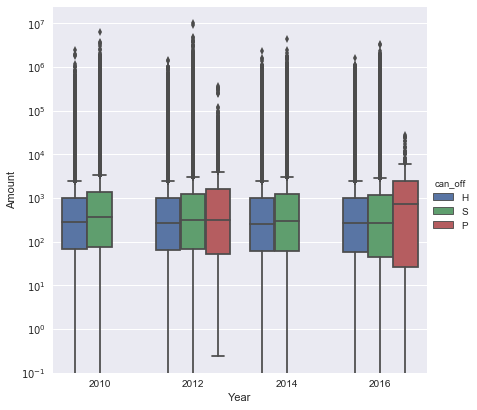

In [9]:
# Distribution of average disbursement amount spend every year 
#creating box-plot
temp = sns.factorplot(x="ele_yea", y="dis_amo", data=df, kind="box", size = 6, hue = "can_off")

#graph properties
temp = temp.set(xlabel='Year', ylabel='Amount')
temp.fig.get_axes()[0].set_yscale('log')


Plot 2: Top 25 Committees expenditure 

In [10]:
import plotly.plotly as py
import pandas as pd
import plotly
from plotly.graph_objs import *
plotly.offline.init_notebook_mode(connected=True)

#creating data
p2 = df.groupby(['com_nam']).agg({'dis_amo' : 'sum'}).reset_index()
# p2 = sns.factorplot(x="ele_yea", y="dis_amo", hue="can_off", data=p2, kind="bar")
# p2 = p2.set(xlabel='Year', ylabel='Avg of Amount Of Disbursement')
p2 = p2.sort_values('dis_amo', ascending = 0).head(25)

#graph
data = [
    {
        'x': p2['dis_amo'],
        'y': p2['com_nam'],
        'mode': 'markers',
        'marker': {
            'color': [205, 200, 195, 190, 185, 180, 175, 170, 165, 160, 155, 150, 145, 140, 135, 130, 125, 120 ]
#             'size': [15],
#             'showscale': True
        }
    }
]

#grapg properties
layout =go.Layout(title='Top 25 Committes on which disbursement amount was spent',
                  width=1000,
                  xaxis = dict(title = 'Disbursment Amount'),
                  yaxis = dict(title = 'Committees Name'),
                 margin=go.Margin(
       l=300,
       r=50,
       b=100,
       t=100,
       pad=4
   ))
fig = go.Figure(data=data, layout=layout)

#plot
plotly.offline.iplot(fig, filename='scatter-colorscale')


PLot 3: What are the top 25 top disbursement purposes in terms of amount spent?

In [11]:
# creating data
p3 = df.groupby('dis_pur_des').count()['dis_amo'].reset_index()
p3 = p3.sort_values('dis_amo', ascending=0).head(25)

# viewing data in dataframe
p3.head()

,dis_pur_des,dis_amo
184796,PAYROLL,105054
236408,SALARY,104994
257599,TRAVEL,96159
172727,OFFICE SUPPLIES,86646
193528,POSTAGE,80546


In [12]:
# Distribution of disbursement amount spent on top 25 disbursement purpose 
import plotly.plotly as py
import pandas as pd
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)

# data
p3 = df.groupby('dis_pur_des').count()['dis_amo'].reset_index()
p3 = p3.sort_values('dis_amo', ascending=0).head(25)

# graph
trace1 = go.Bar(
    x=p3['dis_pur_des'],
    y=p3['dis_amo']
)
data = [trace1]

#graph properties
layout =go.Layout(title='Distribution of disbursement amount spent on top 25 disbursement purpose',
                  width=1000,
                  xaxis = dict(title = 'Purpose'),
                  yaxis = dict(title = 'Count'))
fig = go.Figure(data=data, layout=layout)

#plot
plotly.offline.iplot(fig, filename='grouped-bar')

We found out that PayRoll, Salary and Travel are the top three reason for the maximum amount of disbursment was spent

In [13]:
#creating a copy of individual dataframe for all graphs using dates
df2010_dt = df2010
df2012_dt = df2012 
df2014_dt = df2014 
df2016_dt = df2016

Plot 4: To deep down little more, the below visualization is to show how much the disburesment amount is spend on Travel

In [14]:
import plotly.plotly as py
import pandas as pd
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)

#creating data

df10_travel = df2010_dt[df2010_dt['dis_pur_des'].str.contains('travel', case=0, na=False)]
df12_travel = df2012_dt[df2012_dt['dis_pur_des'].str.contains('travel', case=0, na=False)]
df14_travel = df2014_dt[df2014_dt['dis_pur_des'].str.contains('travel', case=0, na=False)]
df16_travel = df2016_dt[df2016_dt['dis_pur_des'].str.contains('travel', case=0, na=False)]

# df10_merge = pd.merge(df2010_dt_sb, df10_travel, on=df10_travel['dis_pur_des'], how='inner')
# df10_travel.head()

df_gp0 = df10_travel.groupby('ele_yea').agg({'dis_pur_des' : 'nunique'}).reset_index()
df_gp2 = df12_travel.groupby('ele_yea').agg({'dis_pur_des' : 'nunique'}).reset_index()
df_gp4 = df14_travel.groupby('ele_yea').agg({'dis_pur_des' : 'nunique'}).reset_index()
df_gp6 = df16_travel.groupby('ele_yea').agg({'dis_pur_des' : 'nunique'}).reset_index()

df_gp = pd.concat([df_gp0,df_gp2,df_gp4,df_gp6]).reset_index()
df_gp = df_gp.sort_values('ele_yea', ascending = 1)

#creating graph
trace0 = go.Scatter(
    x = df_gp['ele_yea'],
    y = df_gp['dis_pur_des'],
    mode = 'line',
    name = '2010'
 )
trace1 = go.Scatter(
    x = df_gp['ele_yea'],
    y = df_gp['dis_pur_des'],
    mode = 'line',
    name = '2012'
)
trace2 = go.Scatter(
    x = df_gp['ele_yea'],
    y = df_gp['dis_pur_des'],
    mode = 'line',
    name = '2014'
)
trace3 = go.Scatter(
    x = df_gp['ele_yea'],
    y = df_gp['dis_pur_des'],
    mode = 'line',
    name = '2016'
)
data = [ trace0, trace1, trace2, trace3 ]

#graph properties
layout =go.Layout(title='Travel Expenses over the 4 years ',
                  width=1000,
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Disbursement Amount'),
                 barmode = 'stack')

fig = go.Figure(data=data, layout=layout)

#plot
plotly.offline.iplot(fig, filename='basic-line')

The Travel expenses were the most in the year 2010 and least in the year 2016

Plot 5: What are number of Committe Names and Candidate Name for every year? 

In [15]:
p4 = df.groupby('ele_yea').agg({'com_nam' : 'count', 'rec_nam' : 'nunique'}).reset_index()
p4

,ele_yea,com_nam,rec_nam
0,2010,872105,138338
1,2012,869416,124607
2,2014,788522,106120
3,2016,797879,106953


In [16]:
#Number of committees names and number of candidate names per year

import plotly.plotly as py
import pandas as pd
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)

#creating the required data
p4 = df.groupby('ele_yea').agg({'com_nam' : 'nunique', 'can_nam' : 'nunique'}).reset_index()

#graph
trace0 = go.Bar(
    x=p4['ele_yea'],
    y=p4['com_nam'],
    name='Number of Committe Names',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=p4['ele_yea'],
    y=p4['can_nam'],
    name='Number of Candidate Names',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]

#graph properties
layout =go.Layout(title='Number of committees and number of candidates per year',
                  width=1000,
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                 barmode = 'stack')

fig = go.Figure(data=data, layout=layout)

#plot
plotly.offline.iplot(fig, filename='angled-text-bar')

From the above graph the number of candidates and number of committees are highest in the year 2010

Plot 6: Top 25 Number of recipients in terms of state and year

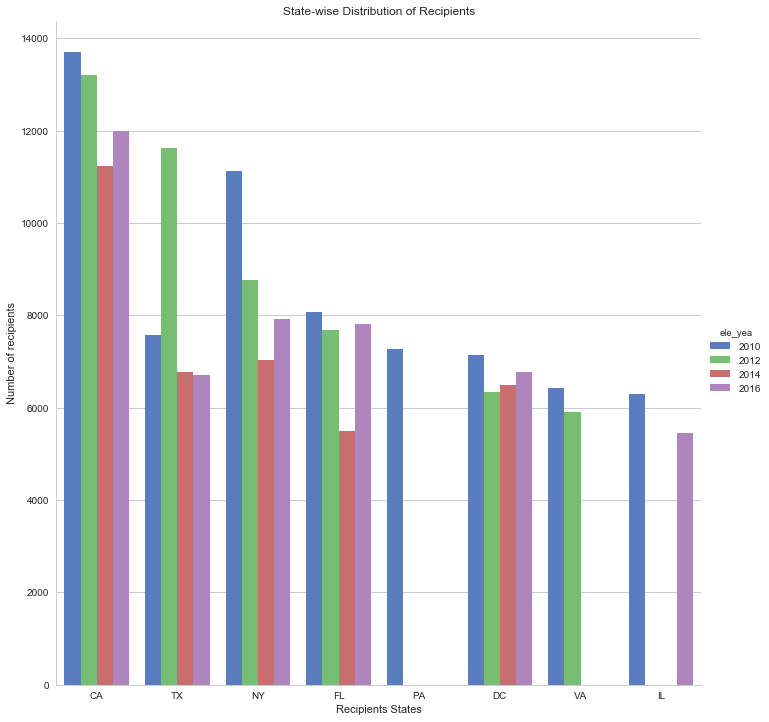

In [17]:
#Distribution of number of recipients in few states

#creating data
p5 = df.groupby(['rec_sta', 'ele_yea']).agg({'rec_nam' : 'nunique'}).reset_index()
p5 = p5.sort_values('rec_nam', ascending=0).head(25)

#seabourn style
sns.set(style="whitegrid")

#creating graph
bar_p5 = sns.factorplot(x="rec_sta", y="rec_nam", hue="ele_yea", data=p5, size=10, kind="bar", palette="muted")
bar_p5 = bar_p5.set(xlabel='Recipients States', ylabel='Number of recipients', title = 'State-wise Distribution of Recipients')

Plot 7: What are the Number of candidates in each state for each year?

In [18]:
# creating a subset of each dataframe for faster processing
df2010_subset = df2010[['can_nam', 'can_off', 'can_off_sta']]
df2012_subset = df2012[['can_nam', 'can_off', 'can_off_sta']]
df2014_subset = df2014[['can_nam', 'can_off', 'can_off_sta']]
df2016_subset = df2016[['can_nam', 'can_off', 'can_off_sta']]

# creating data from individual dataframe
gpy_2010 = df2010.groupby(['can_off_sta']).agg({'can_nam' : 'nunique'}).rename(columns={'can_nam':'2010'})
gpy_2012 = df2012.groupby(['can_off_sta']).agg({'can_nam' : 'nunique'}).rename(columns={'can_nam':'2012'})
gpy_2014 = df2014.groupby(['can_off_sta']).agg({'can_nam' : 'nunique'}).rename(columns={'can_nam':'2014'})
gpy_2016 = df2016.groupby(['can_off_sta']).agg({'can_nam' : 'nunique'}).rename(columns={'can_nam':'2016'})

# concatenating the dataframes
result = pd.concat([gpy_2010, gpy_2012, gpy_2014, gpy_2016], axis=1).reset_index()
result.head()

,index,2010,2012,2014,2016
0,AK,7.0,4,10.0,9
1,AL,29.0,20,28.0,20
2,AR,44.0,15,14.0,9
3,AS,3.0,3,4.0,3
4,AZ,60.0,62,30.0,38


In [19]:
import plotly.plotly as py
import pandas as pd
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)

# creating graph
trace1 = go.Bar(
    x =result['index'], 
    y = result['2010'],
    name= 'Candidates(2010)',
    
)
trace2 = go.Bar(
    x =result['index'], 
    y = result['2012'],
    name= 'Candidates(2012)',
    
)
trace3 = go.Bar(
    x =result['index'], 
    y = result['2014'],
    name= 'Candidates(2014)',
    
)
trace4 = go.Bar(
    x =result['index'], 
    y = result['2016'],
    name= 'Candidates(2016)',
    
)

# graph properties
layout =go.Layout(title='Number of Participating Candidates for every State Wise in each year',legend=dict(orientation="h",x=.2, y=1.0),
                  xaxis = dict(title = 'States'),
                  yaxis = dict(title = 'Number of Candidates'))
fig = go.Figure(data=[trace1,trace2,trace3,trace4], layout=layout)

# plotting the graph
plotly.offline.iplot(fig)


The number of candidates are highest in California for the year 2010

Plot 8: Since in the year 2010 there was most of the expenses, there was a need to check the relation of each year's expenses.
The below gives comparison of expenses between 2010 and 2012,2014,2016. 

In [20]:
#creating a copy of individual file-data
df2010_scatter = df2010[['com_nam','dis_amo']]
df2012_scatter = df2012[['com_nam','dis_amo']]
df2014_scatter = df2014[['com_nam','dis_amo']]
df2016_scatter = df2016[['com_nam','dis_amo']]

In [21]:
import plotly.plotly as py
import pandas as pd
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)

#creating data
gps_2010 = df2010_scatter.groupby(['com_nam']).agg({'dis_amo' : 'sum'}).rename(columns={'dis_amo':'2010'})
gps_2012 = df2012_scatter.groupby(['com_nam']).agg({'dis_amo' : 'sum'}).rename(columns={'dis_amo':'2012'})
gps_2014 = df2014_scatter.groupby(['com_nam']).agg({'dis_amo' : 'sum'}).rename(columns={'dis_amo':'2014'})
gps_2016 = df2016_scatter.groupby(['com_nam']).agg({'dis_amo' : 'sum'}).rename(columns={'dis_amo':'2016'})

result_scatter = pd.concat([gps_2010, gps_2012, gps_2014, gps_2016], axis = 1).reset_index()


#creating graph
trace0 = go.Scatter(
    x = result_scatter['2010'],
    y = result_scatter['2012'],
    name = '2012',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = result_scatter['2010'],
    y = result_scatter['2014'],
    name = '2014',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

trace2 = go.Scatter(
    x = result_scatter['2010'],
    y = result_scatter['2016'],
    name = '2016',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgb(0,255,255, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1, trace2]

#graph properties
layout = dict(title = '',
              yaxis = dict(title = '2012, 2014, 2016'),
              xaxis = dict(title = '2010')
             )

fig = dict(data=data, layout=layout)

#plot
plotly.offline.iplot(fig, filename='styled-scatter')

Most of the expenses were less than 10M

Plot 9: What is the average disbursement amount spent for each office in every year?

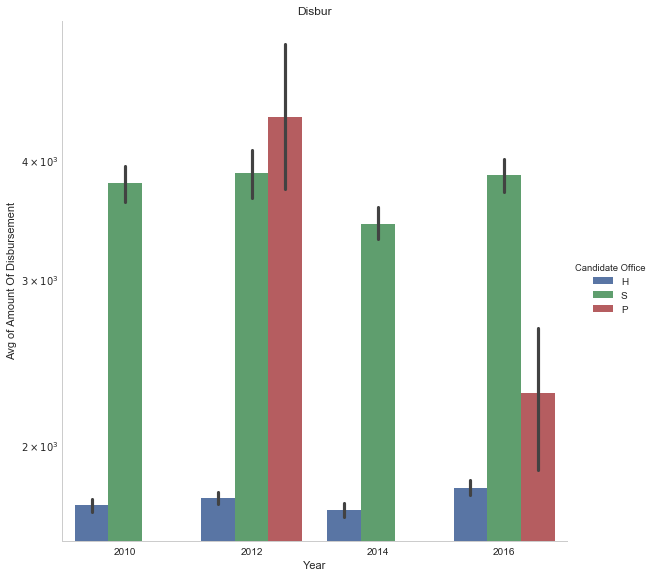

In [22]:
# Average of disbursement amount per year and candidate office

temp_p1 = df
temp_p1 = temp_p1.rename(columns={'can_off' : 'Candidate Office'})
#creating bar chart
p1 = sns.factorplot(x="ele_yea", y="dis_amo", hue="Candidate Office", data=temp_p1, kind="bar", size = 8)


#graph properties
p1 = p1.set(xlabel='Year', ylabel='Avg of Amount Of Disbursement', title = 'Disbur')
p1.fig.get_axes()[0].set_yscale('log')

From the plot we see that the average disbursement amount is highest for 'House' candidate office in the year 2012

Plot 10: Distribution of average amount of disbursement spend for every month in all four years

In [23]:
# Removing all the rows having NaN data in dis_dat column
df2010_dt.dropna(subset = ['dis_dat'], how = 'all', inplace = True)
df2012_dt.dropna(subset = ['dis_dat'], how = 'all', inplace = True)
df2014_dt.dropna(subset = ['dis_dat'], how = 'all', inplace = True)
df2016_dt.dropna(subset = ['dis_dat'], how = 'all', inplace = True)

In [24]:
# coverting dis_dat to datetime format for all the individual dataframe
df2010_dt['date'] = df2010_dt['dis_dat'].astype('datetime64[ns]')
df2010_dt['date'] = pd.to_datetime(df2010_dt['date'])
df2010_dt['month'] = df2010_dt['date'].dt.month
df2010_dt['day'] = df2010_dt['date'].dt.day

df2012_dt['date'] = df2012_dt['dis_dat'].astype('datetime64[ns]')
df2012_dt['date'] = pd.to_datetime(df2012_dt['date'])
df2012_dt['month'] = df2012_dt['date'].dt.month
df2012_dt['day'] = df2012_dt['date'].dt.day

df2014_dt['date'] = df2014_dt['dis_dat'].astype('datetime64[ns]')
df2014_dt['date'] = pd.to_datetime(df2014_dt['date'])
df2014_dt['month'] = df2014_dt['date'].dt.month
df2014_dt['day'] = df2014_dt['date'].dt.day

df2016_dt['date'] = df2016_dt['dis_dat'].astype('datetime64[ns]')
df2016_dt['date'] = pd.to_datetime(df2016_dt['date'])
df2016_dt['month'] = df2016_dt['date'].dt.month
df2016_dt['day'] = df2016_dt['date'].dt.day

In [25]:
# viewing the data in dataframe form
df2010_dt.head()

,com_id,com_nam,can_id,can_nam,ele_yea,can_off,can_off_sta,can_off_dis,lin_num,lin_ima,...,dis_pur_des,mem_cod,mem_tex,cat_cod,cat_des,tra_id,bac_ref_id,date,month,day
0,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6,17,http://docquery.fec.gov/cgi-bin/fecimg/?109306...,...,POSTAGE MACHINE LEASE,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-25707,NaN,2010-04-01,4,1
1,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6,17,http://docquery.fec.gov/cgi-bin/fecimg/?109306...,...,OFFICE RENT,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-25700,NaN,2010-04-01,4,1
2,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,ADVERTISING: WEB ADVERTISING,NaN,NaN,004,Advertising Expenses,B-E-27437,NaN,2010-09-13,9,13
3,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,FUNDRAISING: FUNDRAISING COMMISSION,NaN,NaN,003,Solicitation and Fundraising Expenses,B-E-27443,NaN,2010-09-13,9,13
4,C00372102,JIM GERLACH FOR CONGRESS COMMITTEE,H2PA06114,"GERLACH, JIM",2010,H,PA,6,17,http://docquery.fec.gov/cgi-bin/fecimg/?109314...,...,OVERNIGHT MAIL,NaN,NaN,001,Administrative/Salary/Overhead Expenses,B-E-27432,NaN,2010-09-13,9,13


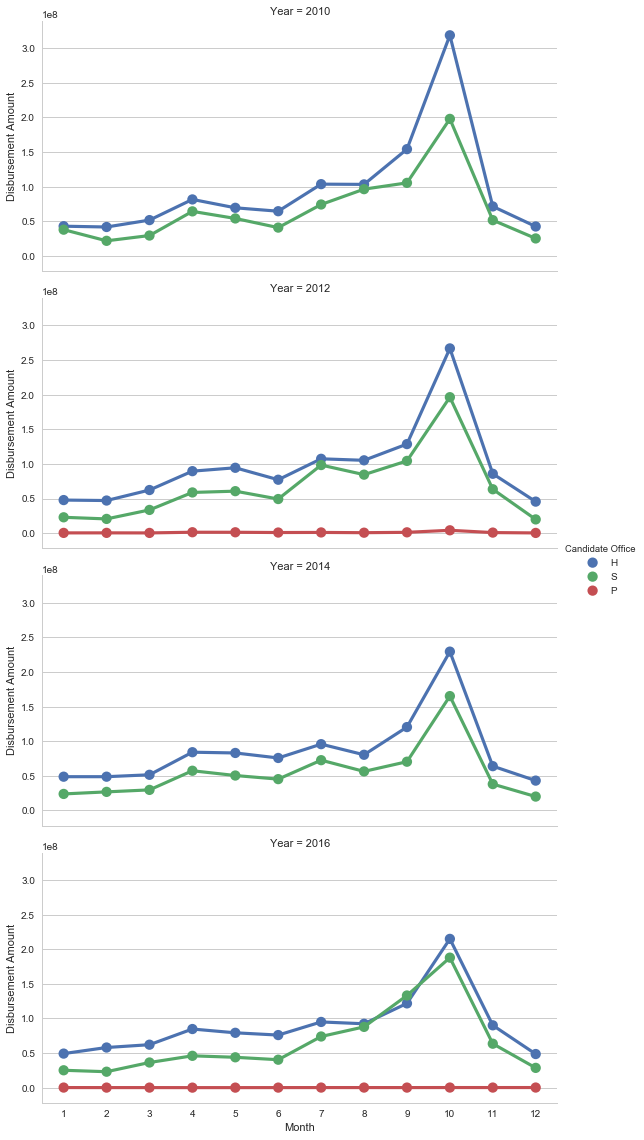

In [26]:
# concating the above dataframes
df_dt = pd.concat([df2010_dt, df2012_dt, df2014_dt, df2016_dt]).reset_index()

# creating data for the graph
df_dt_sb = df_dt.groupby(['month', 'ele_yea', 'can_off']).agg({'dis_amo' : 'sum'}).reset_index()
df_dt_sb = df_dt_sb.rename(columns={"month"   : "Month", 
                                    "ele_yea" : "Year", 
                                    "can_off" : "Candidate Office", 
                                    "dis_amo" : "Disbursement Amount"})

# creating graph
sns.factorplot(x="Month", y="Disbursement Amount", row="Year", 
               hue = 'Candidate Office', data=df_dt_sb, kind="point", size=4, aspect=2)

We found out that for the year
1. 2016: the highest amount of disbursement was spent on October for the 'House'candidate office
2. 2014: the highest amount of disbursement was spent on October for the 'House'candidate office
3. 2012: the highest amount of disbursement was spent on October for the 'House'candidate office
4. 2010: the highest amount of disbursement was spent on October for the 'House'candidate office

Plot 11: Number of committees in all states

In [27]:
import plotly.plotly as py
import pandas as pd
import plotly
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)

# creating data required for the graph
df_map = df.groupby('can_off_sta').agg({'com_id' : 'nunique'}).reset_index()

# df_map.sort_values('com_id', ascending = 0).head()
# creating graph
trace1 = Choropleth(
    z=df_map['com_id'],
    autocolorscale=True,
    colorscale=[[0, 'rgb(139,0,139)'], [1, 'rgb(255,187,255)']],
    locationmode='USA-states',
    locations=df_map['can_off_sta'],
    showscale=False,
    zauto=True,
)

data = Data([trace1])

# graph properties
layout = Layout(
    autosize=False,
    geo=dict(
        countrycolor='rgb(0,0,255)',
        countrywidth=0.1,
        lakecolor='rgb(0,0,255)',
        landcolor='rgba(0,0,255)',
        lonaxis=dict(
            gridwidth=1.5999999999999999,
            range=[-180, -50],
            showgrid=False
        ),
        projection=dict(
            type='albers usa'
        ),
        scope='usa',
        showland=True,
        showrivers=False,
        showsubunits=True,
        subunitcolor='rgb(102, 102, 102)',
        subunitwidth=0.5
    ),

    showlegend=True,
    title='<b>Number of Committees all over USA-states</b>',
    width= 800,
    margin = dict(
        l=0,
        r=50,
        b=100,
        t=100,
        pad=4)
)
fig = Figure(data=data, layout=layout)

# plot
plotly.offline.iplot(fig, filename='pace')

We see that the top 3 states with highest number of candidates are: California, Florida and Texas